In [16]:
%config InlineBackend.figure_format ='retina'

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd
import folium
from shapely.geometry import Point
from shapely import wkt
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [19]:
filepath = '../data/forbes_billionaires_geo.csv'
data = pd.read_csv(filepath)
print(data)

                          Name  NetWorth        Country         Source  Rank  \
0                   Jeff Bezos     177.0  United States         Amazon     1   
1                    Elon Musk     151.0  United States  Tesla, SpaceX     2   
2     Bernard Arnault & family     150.0         France           LVMH     3   
3                   Bill Gates     124.0  United States      Microsoft     4   
4              Mark Zuckerberg      97.0  United States       Facebook     5   
...                        ...       ...            ...            ...   ...   
2750         Daniel Yong Zhang       1.0          China     e-commerce  2674   
2751             Zhang Yuqiang       1.0          China     Fiberglass  2674   
2752             Zhao Meiguang       1.0          China    gold mining  2674   
2753            Zhong Naixiong       1.0          China   conglomerate  2674   
2754           Zhou Wei family       1.0          China       Software  2674   

       Age              Residence    Ci

In [20]:
filepath = '../data/forbes_billionaires_geo.csv'
data = pd.read_csv(filepath)
name = data['Name'][:10]
children = data['Children'][:10]
networth = data['NetWorth'][:10]
d = {"Name": name, "Children": children, "Net Worth": networth}
df = pd.DataFrame(d)
df

,Name,Children,Net Worth
0,Jeff Bezos,4.0,177.0
1,Elon Musk,7.0,151.0
2,Bernard Arnault & family,5.0,150.0
3,Bill Gates,3.0,124.0
4,Mark Zuckerberg,2.0,97.0
5,Warren Buffett,3.0,96.0
6,Larry Ellison,4.0,93.0
7,Larry Page,1.0,91.5
8,Sergey Brin,3.0,89.0
9,Mukesh Ambani,3.0,84.5


In [21]:
df["Children"][:10].mean()

3.5

In [14]:
import pandas as pd
filepath = '../data/forbes_billionaires_geo.csv'
data = pd.read_csv(filepath)
name = data['Name'][:100]
children = data['Children'][:100]
networth = data['NetWorth'][:100]
d = {"Name": name, "Children": children, "Net Worth": networth}
df = pd.DataFrame(d)
df

,Name,Children,Net Worth
0,Jeff Bezos,4.0,177.0
1,Elon Musk,7.0,151.0
2,Bernard Arnault & family,5.0,150.0
3,Bill Gates,3.0,124.0
4,Mark Zuckerberg,2.0,97.0
...,...,...,...
95,Eric Schmidt,2.0,18.9
96,Sun Piaoyang,1.0,18.9
97,"Theo Albrecht, Jr. & family",1.0,18.8
98,Alisher Usmanov,NaN,18.4


In [13]:
df["Children"][:100].mean()

3.0972222222222223

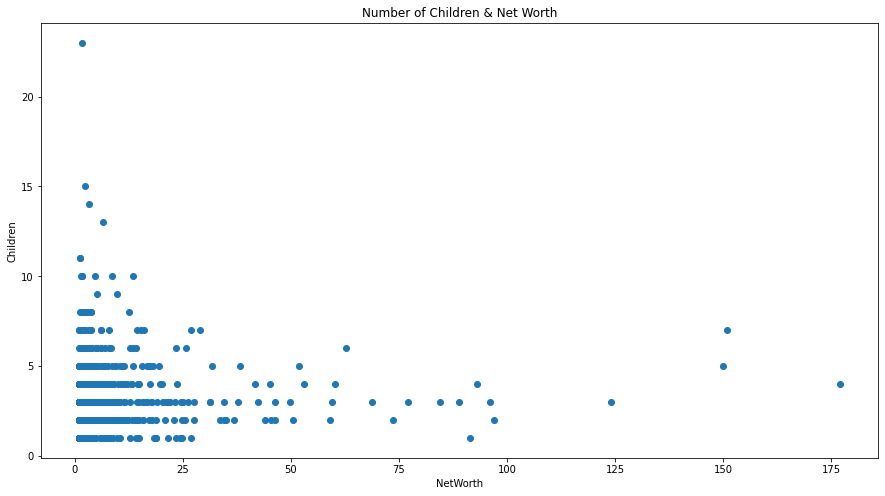

In [12]:
import pandas as pd
filepath = '../data/forbes_billionaires_geo.csv'
data = pd.read_csv(filepath)
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x = data['NetWorth'], y = data['Children'])
plt.xlabel("NetWorth")
plt.ylabel("Children")
plt.title("Number of Children & Net Worth");

plt.show()
fig.figure.savefig('kids1.pdf', bbox_inches='tight')

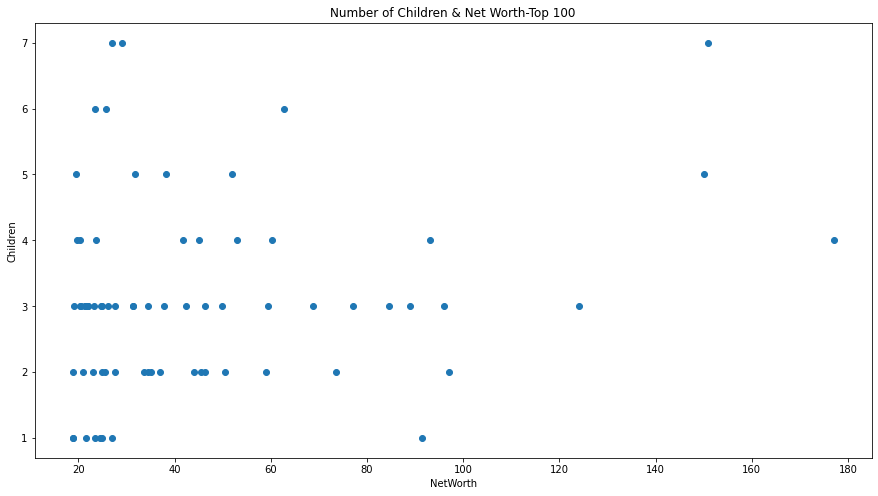

In [13]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x = data['NetWorth'][:100], y = data['Children'][:100])
plt.xlabel("NetWorth")
plt.ylabel("Children")
plt.title("Number of Children & Net Worth-Top 100");

plt.show()
fig.figure.savefig('kids2.pdf', bbox_inches='tight')

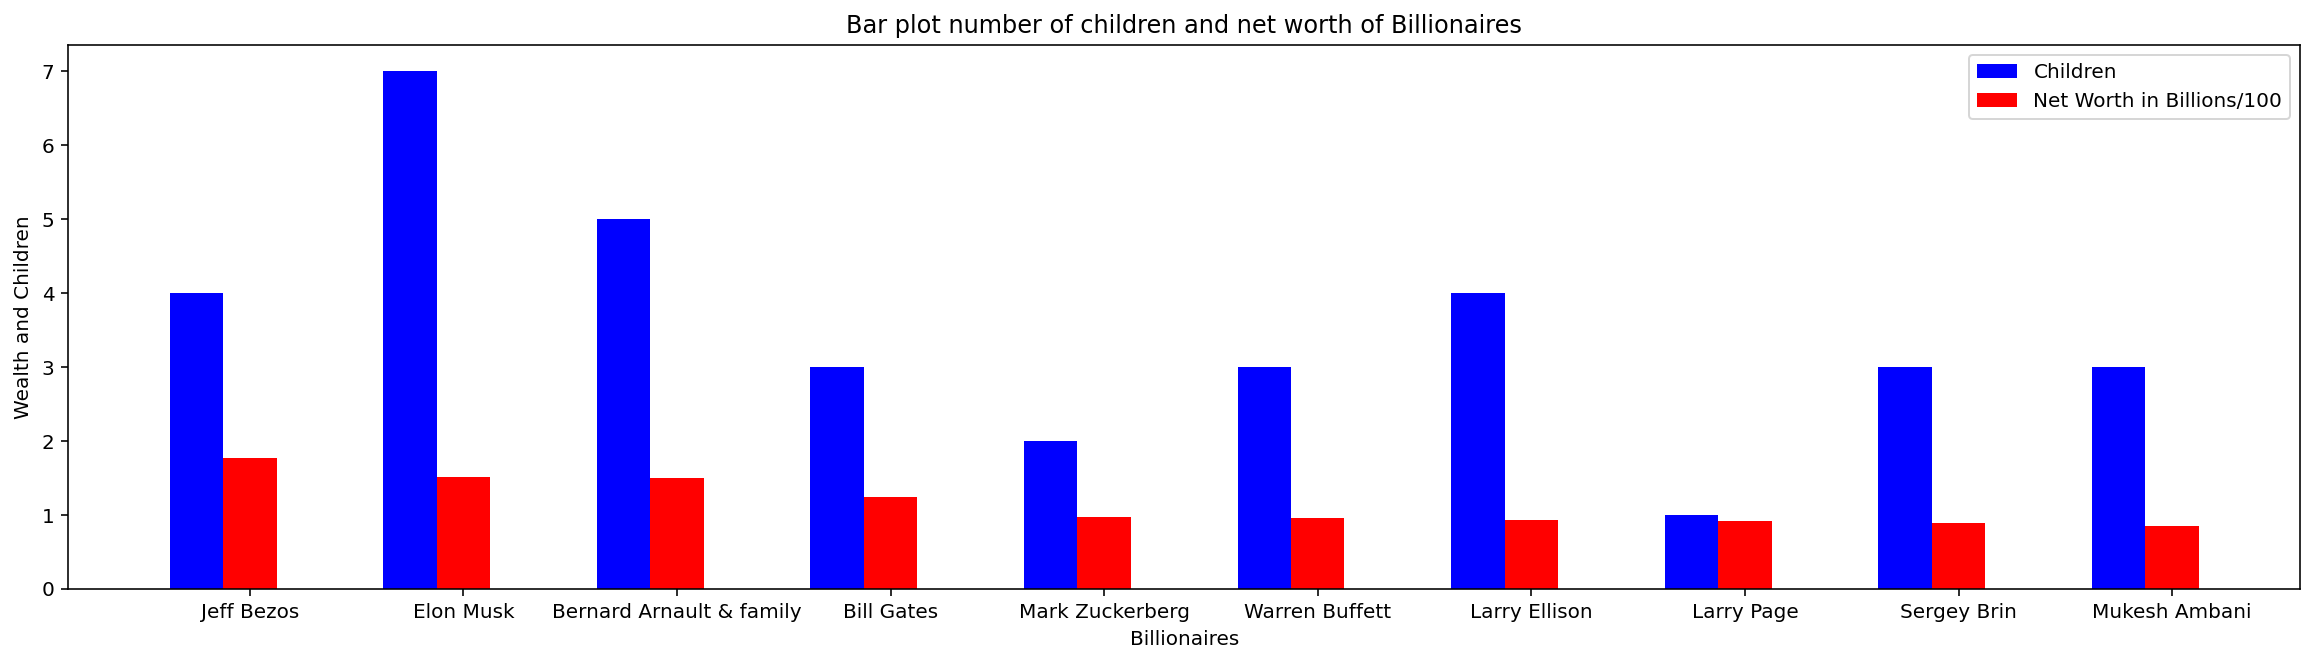

In [8]:
import requests
import io
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd
import folium
from shapely.geometry import Point
from shapely import wkt

filepath = '../data/forbes_billionaires_geo.csv'
df = pd.read_csv(filepath)


def divideBy100(number):
    return number / 100


names = df['Name'][:10]
sizeOfEntries = len(names)
children = df['Children'][:10]
netWorth = list(map(divideBy100, df['NetWorth'][:10]))

plt.figure(figsize=(20,5))
X = np.arange(sizeOfEntries)

plt.bar(X, children, color = 'b', width = 0.25)
plt.bar(X + 0.25, netWorth, color = 'r', width = 0.25)
plt.legend(['Children', 'Net Worth in Billions/100'])
plt.xticks([i + 0.25 for i in range(sizeOfEntries)], names)
plt.title("Bar plot number of children and net worth of Billionaires")


plt.xlabel('Billionaires')
plt.ylabel('Wealth and Children')
plt.savefig('wealth-and-children.png')
plt.show()

In [9]:
filepath = '../data/forbes_billionaires_geo.csv'
data = pd.read_csv(filepath)
name = data['Name'][:10]
country = data['Country'][:10]
networth = data['NetWorth'][:10]
d = {"Name": name, "Country": country, "Net Worth": networth}
df = pd.DataFrame(d)
df

,Name,Country,Net Worth
0,Jeff Bezos,United States,177.0
1,Elon Musk,United States,151.0
2,Bernard Arnault & family,France,150.0
3,Bill Gates,United States,124.0
4,Mark Zuckerberg,United States,97.0
5,Warren Buffett,United States,96.0
6,Larry Ellison,United States,93.0
7,Larry Page,United States,91.5
8,Sergey Brin,United States,89.0
9,Mukesh Ambani,India,84.5


In [10]:
df["Country"][:10].mode()

0    United States
dtype: object

In [11]:
filepath = '../data/forbes_billionaires_geo.csv'
data = pd.read_csv(filepath)
name = data['Name'][:10]
children = data['Children'][:10]
country = data['Country'][:10]
d = {"Name": name, "Children": children, "Country": country}
df = pd.DataFrame(d)
df

,Name,Children,Country
0,Jeff Bezos,4.0,United States
1,Elon Musk,7.0,United States
2,Bernard Arnault & family,5.0,France
3,Bill Gates,3.0,United States
4,Mark Zuckerberg,2.0,United States
5,Warren Buffett,3.0,United States
6,Larry Ellison,4.0,United States
7,Larry Page,1.0,United States
8,Sergey Brin,3.0,United States
9,Mukesh Ambani,3.0,India


In [12]:
filepath = '../data/billionaire.csv'
data = pd.read_csv(filepath)
print(data)

                          Name NetWorth        Country         Source  Rank  \
0                   Jeff Bezos   $177 B  United States         Amazon     1   
1                    Elon Musk   $151 B  United States  Tesla, SpaceX     2   
2     Bernard Arnault & family   $150 B         France           LVMH     3   
3                   Bill Gates   $124 B  United States      Microsoft     4   
4              Mark Zuckerberg    $97 B  United States       Facebook     5   
...                        ...      ...            ...            ...   ...   
2750         Daniel Yong Zhang     $1 B          China     e-commerce  2674   
2751             Zhang Yuqiang     $1 B          China     Fiberglass  2674   
2752             Zhao Meiguang     $1 B          China    gold mining  2674   
2753            Zhong Naixiong     $1 B          China   conglomerate  2674   
2754           Zhou Wei family     $1 B          China       Software  2674   

       Age          Industry  
0     57.0        Te

In [13]:
filepath = '../data/billionaire.csv'
data = pd.read_csv(filepath)
name = data['Name'][:10]
country = data['Country'][:10]
industry = data['Industry'][:10]
d = {"Name": name, "Country": country, "Industry": industry}
df = pd.DataFrame(d)
df

,Name,Country,Industry
0,Jeff Bezos,United States,Technology
1,Elon Musk,United States,Automotive
2,Bernard Arnault & family,France,Fashion & Retail
3,Bill Gates,United States,Technology
4,Mark Zuckerberg,United States,Technology
5,Warren Buffett,United States,Finance & Investments
6,Larry Ellison,United States,Technology
7,Larry Page,United States,Technology
8,Sergey Brin,United States,Technology
9,Mukesh Ambani,India,Diversified


In [14]:
filepath = '../data/billionaire.csv'
data = pd.read_csv(filepath)
name = data['Name'][:10]
country = data['Country'][:10]
industry = data['Industry'][:10]
d = {"Name": name, "Country": country, "Industry": industry}
df = pd.DataFrame(d)
df['Industry'][:10].mode()

0    Technology
dtype: object

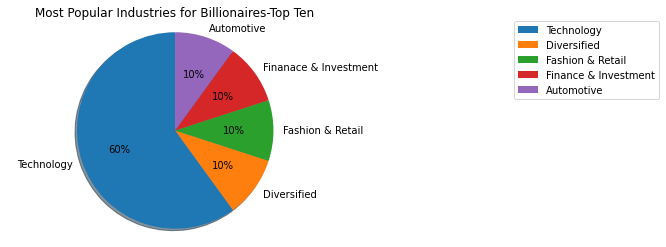

In [1]:
import matplotlib.pyplot as plt
name = ['Technology', 'Diversified', 'Fashion & Retail', 'Finanace & Investment', 'Automotive']
people = [6, 1, 1, 1, 1]
plt.pie(people, labels=name, autopct='%0.f%%', shadow=True, startangle=90);
plt.title("Most Popular Industries for Billionaires-Top Ten");
plt.legend(['Technology', 'Diversified','Fashion & Retail','Finance & Investment','Automotive'],bbox_to_anchor=(1.5,1.03),loc="upper left");
plt.axis('equal');
plt.savefig('pie1.pdf', bbox_inches='tight')

In [7]:
import pandas as pd

In [8]:
filepath = '../data/billionaire.csv'
data = pd.read_csv(filepath)
print(data)

                          Name NetWorth        Country         Source  Rank  \
0                   Jeff Bezos   $177 B  United States         Amazon     1   
1                    Elon Musk   $151 B  United States  Tesla, SpaceX     2   
2     Bernard Arnault & family   $150 B         France           LVMH     3   
3                   Bill Gates   $124 B  United States      Microsoft     4   
4              Mark Zuckerberg    $97 B  United States       Facebook     5   
...                        ...      ...            ...            ...   ...   
2750         Daniel Yong Zhang     $1 B          China     e-commerce  2674   
2751             Zhang Yuqiang     $1 B          China     Fiberglass  2674   
2752             Zhao Meiguang     $1 B          China    gold mining  2674   
2753            Zhong Naixiong     $1 B          China   conglomerate  2674   
2754           Zhou Wei family     $1 B          China       Software  2674   

       Age          Industry  
0     57.0        Te

In [24]:
filepath = '../data/billionaire.csv'
data = pd.read_csv(filepath)
name = data['Name'][:100]
country = data['Country'][:100]
industry = data['Industry'][:100]
d = {"Name": name, "Country": country, "Industry": industry}
df = pd.DataFrame(d)
df['Industry'][:100].mode()

0    Technology
dtype: object

In [25]:
filepath = '../data/billionaire.csv'
data = pd.read_csv(filepath)
name = data['Name'][:1000]
country = data['Country'][:1000]
industry = data['Industry'][:1000]
d = {"Name": name, "Country": country, "Industry": industry}
df = pd.DataFrame(d)
df['Industry'][:1000].mode()

0    Finance & Investments
dtype: object

In [26]:
filepath = '../data/billionaire.csv'
data = pd.read_csv(filepath)
name = data['Name']
country = data['Country']
industry = data['Industry']
d = {"Name": name, "Country": country, "Industry": industry}
df = pd.DataFrame(d)
df['Industry'].mode()

0    Finance & Investments
dtype: object

In [28]:
df['Industry'].value_counts()

Finance & Investments         371
Technology                    365
Manufacturing                 331
Fashion & Retail              273
Healthcare                    221
Food & Beverage               219
Real Estate                   215
Diversified                   188
Energy                        100
Media & Entertainment          95
Service                        75
Metals & Mining                74
Automotive                     68
Construction & Engineering     44
Logistics                      35
Telecom                        32
Gambling & Casinos             25
Sports                         24
Name: Industry, dtype: int64

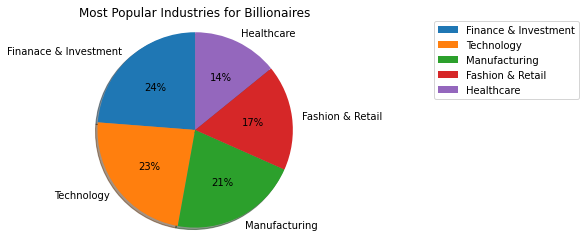

In [2]:
import matplotlib.pyplot as plt
name = ['Finanace & Investment', 'Technology', 'Manufacturing', 'Fashion & Retail', 'Healthcare']
people = [371, 365, 331, 273, 221]
plt.pie(people, labels=name, autopct='%0.f%%', shadow=True, startangle=90);
plt.title("Most Popular Industries for Billionaires");
plt.legend(['Finance & Investment', 'Technology','Manufacturing','Fashion & Retail','Healthcare'],bbox_to_anchor=(1.2,1.03),loc="upper left");
plt.axis('equal');
plt.savefig('pie2.pdf', bbox_inches='tight')